In [1]:
import torch
import clip
from PIL import Image

In [2]:
l = ["a dog on a motorcycle", "a dog", "a motorcyclist"]
image_path = "sample_images/dog.jpeg"

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

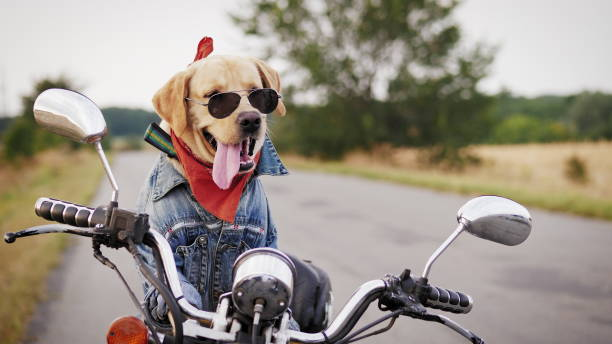

a dog on a motorcycle ==> 99.56%
a dog ==> 0.02%
a motorcyclist ==> 0.43%


In [3]:
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
text = clip.tokenize(l).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

display(Image.open(image_path))
for i in range(len(l)):
    print(f'{l[i]} ==> {probs[0, i]*100:.2f}%')